# Part 2 : Initial Explorations

## Problem Statement

The main purpose of this project is to learn about what drives the price of pork in Colombia and be able to make demand predictions based on data found from different sources. The first question I wanted to answer was if there was a way to measure the price pork is sold in Colombia. Fortunaetly, there is an association in Colombia that tracks this http://asoporcicultores.co/. After talking with one of the representatives I was able to obtain two datasets. The datasets are different in that one shows the price of pork/Kg before the animal is sacrificed and the other after. Since the company I'm working with sacrifice their animals, we are going to use the second dataset. I will still use the other data later to see if it is recomendable that they sell without sacrificing.

## Proposed Methods and Models

Since all of the data I have collected have dates, this makes the project a Time Series(TS) problem. TS models are special because they have different assumptions than linear models. First, TS models are time dependent so the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case. Second, most TS have some form of seasonality trends (variations specific to a particular time frame). Because of the inherent properties of a TS, there are various steps involved in analyzing it:

1) Load the Data into the Ipython notebook and use pandas to  handle the data.

2) Check Stationarity. A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. This is important because most of the TS models work on the assumption that the TS is stationary. We can check stationarity using the following:

        A) We can plot the moving average or moving variance and see if it varies with time.
        B) Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null 
        hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical 
        Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can 
        reject the null hypothesis and say that the series is stationary.

3) Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. If the Data obtained is not stationary, some transformations are needed. The two mayor reasons why a model is non-stationary are because of trends (varying mean over time) and seasonality (variations at specific time-frames). The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series.

4) Forecasting the Time Series. Initially my idea is to perform an Auto-Regressive Integrated Moving Averages (ARIMA) Model.

5) The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

The main idea is to be able to predict the price of pork towards the end of 2016. 

## Risks and Assumptions

-none

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
df = pd.read_csv('../Assets/Precio Semanal de Cerdo por Kg.csv')
df.head()

,Date,Antioquia,Eje,Bogot�,Valle,Nacional
0,8-Jan-10,6462.33,6189.75,6115.75,NaN,6229.16
1,15-Jan-10,6438.47,6091.18,6214.40,NaN,6194.56
2,22-Jan-10,6321.18,6162.45,6256.79,NaN,6221.21
3,29-Jan-10,6259.65,6110.11,6351.40,NaN,6186.28
4,5-Feb-10,6239.19,6127.92,6287.73,NaN,6189.93


Looking at the head of the dataframe one can see that the columns need some renaming, the date needs to be formated into a python datetime and there are some NaN values in the data that need attention. The null values appear first in the region 'Valle' which probably means that they didnt aquire data for thos initial dates. After that there are some rows containing null values, that correspond to December 24 and January 1. Clearly this are national holidays in Colombia and no body was working on collecting data. I believe that the best thing to do is to remove these dates.

In [34]:
df.describe()

,Antioquia,Eje,Bogot�,Valle,Nacional
count,335.000000,335.000000,335.000000,329.000000,335.000000
mean,5989.151582,5885.945582,6170.178448,5900.785319,5982.429522
std,465.714614,429.033896,409.407581,484.758858,435.550641
min,4646.580000,4911.830000,5202.750000,4954.460000,5060.040000
25%,5645.815000,5550.195000,5924.720000,5504.210000,5654.365000
50%,5974.230000,5894.670000,6137.920000,5833.420000,5973.050000
75%,6406.295000,6165.100000,6511.155000,6201.840000,6267.630000
max,6821.090000,6617.850000,6971.590000,6899.940000,6758.830000


### Data Dictionary

In [35]:
df.columns = ['Date','Antioquia', 'Eje_Cafetero','Bogota','Valle','Nacional']
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.dropna()

In [36]:
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace= True)
df.index = df.index.to_datetime()

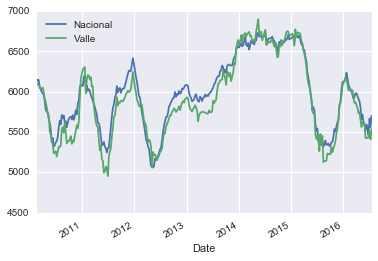

In [37]:
df[['Nacional','Valle']].plot()

This plot shows something interesting about the price per Kg of pork in Colombia. Looking at the graph one sees that there is an initial seasonal effect on the price, but in early 2013 to early 2015 this seasonal effect did not occur. Clearly there is something that affected this seasonality. Through some research I was able to find some interesting ideas about what could have affected the price. According to the website metioned before, in the region where the company is located, 75% of the cost of growing a pig towards the 100Kg mark comes from buying food and all its asociated costs. In the company, the animals are feed a mixture of yellow maize and other nutrients. Upon taling to the buying department, I was told that all the Maize is bought in the Chicago Mercantile Exchange. 

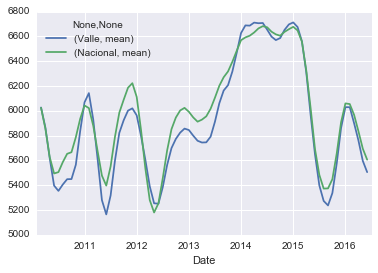

In [38]:
avg = df[['Valle','Nacional']].resample('M',how=['mean'])
rolling = pd.rolling_mean(avg, window=3, center=True)
rolling.plot()

In [39]:
df2 = pd.read_csv('../Assets/CornPrice.csv')
df2.columns = [u'Year', u'Frequency', u'Attribute', u'Commodity', u'Unit',
               u'Central', u'Gulfports', u'Omaha',u'Chicago', 
               u'Kansas', u'Toledo', u'Memphis', u'Minneapolis']

In [40]:
df2.describe()

,Year,Central,Gulfports,Omaha,Chicago,Kansas,Toledo,Memphis,Minneapolis
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,2010.761905,4.523651,5.210935,4.559810,4.678611,4.640575,4.613849,4.694816,4.354013
std,3.050059,1.578664,1.554768,1.614113,1.560941,1.620147,1.585114,1.506713,1.542906
min,2006.000000,1.980000,2.610000,1.880000,2.040000,1.920000,1.940000,2.210000,1.780000
25%,2008.000000,3.495000,4.146250,3.520000,3.652500,3.571250,3.547500,3.713800,3.306250
50%,2011.000000,3.755000,4.545000,3.801500,3.920000,3.885900,3.835000,4.057500,3.650000
75%,2013.000000,5.977500,6.690000,6.053750,6.155000,6.172500,6.030000,6.145050,5.948125
max,2016.000000,8.150000,8.455000,8.110000,8.315000,8.215000,8.160000,7.645000,7.740000


In [41]:
df2.dtypes

Year             int64
Frequency       object
Attribute       object
Commodity       object
Unit            object
Central        float64
Gulfports      float64
Omaha          float64
Chicago        float64
Kansas         float64
Toledo         float64
Memphis        float64
Minneapolis    float64
dtype: object

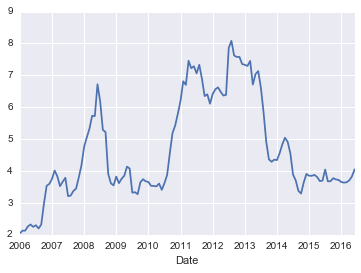

In [42]:
# Since the year and the month are in different pandas columns
# I'm going to merge these columns together.

y = []
for i in range(len(df2)):
    y.append(str(df2.Year[i]) + '-' + df2.Frequency[i])
    
# The new Date column then is transformed into a DateTime object.

df2['Date'] = y
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%b')
df2 = df2.iloc[:,2:]

# Obtaining the Average Price for the US.

ave =[]

for i in range(len(df2)):
    s = (df2.Central[i] + df2.Gulfports[i]+ df2.Omaha[i] + df2.Chicago[i] 
         + df2.Kansas[i] + df2.Toledo[i] + df2.Memphis[i] + df2.Minneapolis[i])
    ave.append(s/8.0)
    
df2['Average'] = ave

# The Date is then used as the index for the DataFrame.

df2.sort_values('Date', inplace=True)
df2.set_index('Date', inplace= True)
df2.index = df2.index.to_datetime()
df2['Average'].plot()

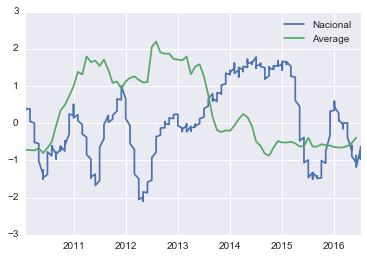

In [43]:
scaler = preprocessing.StandardScaler()
# Here we are transforming the index of the average prices in the USA
# to only show the year and the month
df3 = pd.DataFrame(df2['Average'], index = df2.index)
df3 = df3.to_period(freq='M')
df3['Average'] = scaler.fit_transform(df3['Average'])
# Here we are doing the same to the Colombian pork prices
df4 = pd.DataFrame(df['Nacional'], index = df.index)
df4 = df4.to_period(freq='M')
df4['Nacional'] = scaler.fit_transform(df4['Nacional'])
# The we Merge the two dataframes where their index match
df5 = df4.join(df3,rsuffix='_y')
df5.plot()

In [44]:
# We are importing the Exports Data
df6 = pd.read_csv('../Assets/ExportstoColombia.csv')
# Since the year and the month are in different pandas columns
# I'm going to merge these columns together.

y = []
for i in range(len(df6)):
    y.append(str(df6.Year[i]) + '-' + df6.Frequency[i])
    
# The new Date column then is transformed into a DateTime object.

df6['Date'] = y
df6['Date'] = pd.to_datetime(df6['Date'], format='%Y-%b')
Exports = df6.iloc[:,6:]

# The Date is then used as the index for the DataFrame.

Exports.sort_values('Date', inplace=True)
Exports.set_index('Date', inplace= True)
Exports.index = Exports.index.to_datetime()

# Removing the day from the DateTime object
Exports = Exports.to_period(freq='M')

# Scaling the Amounts
Exports['Amount'] = scaler.fit_transform(Exports['Amount'])



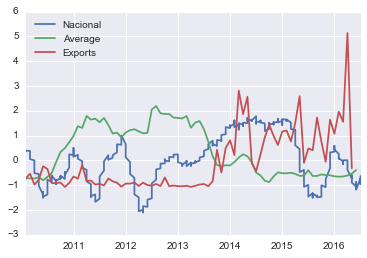

In [45]:
df5['Exports'] = Exports['Amount']
df5.plot()

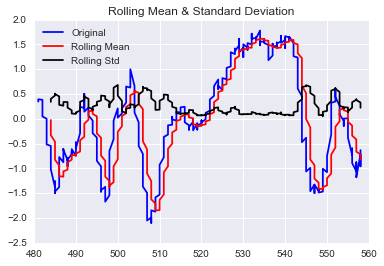

Results of Dickey-Fuller Test:
Test Statistic                  -2.994907
p-value                          0.035373
#Lags Used                       3.000000
Number of Observations Used    325.000000
Critical Value (5%)             -2.870474
Critical Value (1%)             -3.450632
Critical Value (10%)            -2.571530
dtype: float64


In [59]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
test_stationarity(df5['Nacional'])

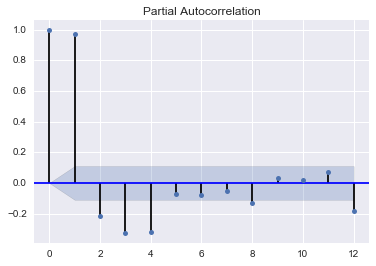

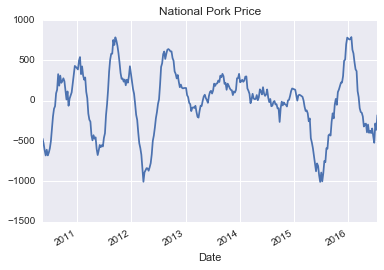

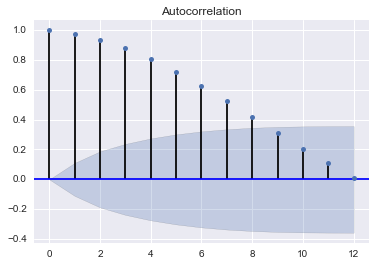

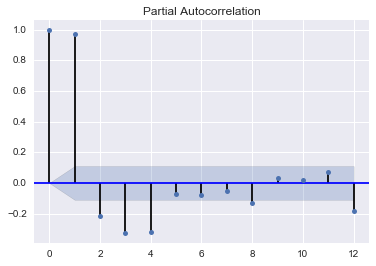

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff0 = df['Nacional'].diff(periods=12)[12:]

diff0.plot(title='National Pork Price')
plot_acf(diff0, lags=12)
plot_pacf(diff0, lags=12)